<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файлов" data-toc-modified-id="Изучение-данных-из-файлов-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файлов</a></span><ul class="toc-item"><li><span><a href="#Откроем-файлы-и-изучим-их" data-toc-modified-id="Откроем-файлы-и-изучим-их-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Откроем файлы и изучим их</a></span></li><li><span><a href="#Данные-о-фильмах-и-сериалах" data-toc-modified-id="Данные-о-фильмах-и-сериалах-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Данные о фильмах и сериалах</a></span></li><li><span><a href="#Данные-об-актёрах--и-режисёрах" data-toc-modified-id="Данные-об-актёрах--и-режисёрах-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Данные об актёрах  и режисёрах</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Пропуски" data-toc-modified-id="Пропуски-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Пропуски</a></span></li><li><span><a href="#Преобразуем-столбецы-жанра-и-страны-производителя" data-toc-modified-id="Преобразуем-столбецы-жанра-и-страны-производителя-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Преобразуем столбецы жанра и страны производителя</a></span></li></ul></li><li><span><a href="#Анализ-данных-и-визуализация" data-toc-modified-id="Анализ-данных-и-визуализация-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных и визуализация</a></span><ul class="toc-item"><li><span><a href="#Посмотрим-какие-жанры-пользуются-наибольшей-пополярностью" data-toc-modified-id="Посмотрим-какие-жанры-пользуются-наибольшей-пополярностью-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Посмотрим какие жанры пользуются наибольшей пополярностью</a></span></li><li><span><a href="#Какие-фильмы-являются-самыми-обсуждаемыми" data-toc-modified-id="Какие-фильмы-являются-самыми-обсуждаемыми-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Какие фильмы являются самыми обсуждаемыми</a></span></li><li><span><a href="#Какие-режиссеры-выпустили-наибольшее-кол-во-фильмов-и-сериалов" data-toc-modified-id="Какие-режиссеры-выпустили-наибольшее-кол-во-фильмов-и-сериалов-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Какие режиссеры выпустили наибольшее кол-во фильмов и сериалов</a></span></li><li><span><a href="#Какие-возрастные-категории-самые-популярные" data-toc-modified-id="Какие-возрастные-категории-самые-популярные-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Какие возрастные категории самые популярные</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Исследование состояния просмотров фильмов/сериалов на платформе

**Описание задания**

Представь, что ты работаешь аналитиком в компании Netflix. Завтра у тебя состоится
встреча с топ-менеджерами и твоя задача подготовить верхнеуровневый борд, который покажет
текущее состояние просмотров фильмов/сериалов на платформе.

Точно хотелось бы увидеть какие жанры пользуется наибольшей популярностью (тут стоит
учитывать не только балл, а также кол-во голосов). Какой/какие фильмы являются самыми
обсуждаемыми на платформе. Какой режиссер/режиссеры выпустили наибольшее кол-во
фильмов.

Количество графиков и бордов в целом неограниченно, кроме вышеуказанных метрик – ты
можешь построить любые другие, если они помогут сделать правильные выводы и оценить
ситуацию по просмотрам. Главное, не забывай – мы строим верхнеуровненвый борд для топов!

## Изучение данных из файлов

### Откроем файлы и изучим их

Чтобы изучить данные датафрейма, сделать необходимые рассчёты, провести исследование и составить отчёт сразу импортируем библиотеки, который нам потребуются в данном проекте

In [25]:
from io import BytesIO # импорт библиотеки BytesIO

import ast # импорт библиотеки ast
import numpy as np # импорт библиотеки numpy
import pandas as pd # импорт библиотеки pandas
import random # импорт библиотеки random
import requests  # импорт библиотеки requests
import seaborn as sns # импорт библиотеки seaborn

Сохраним файл на `Google Sheets` и расшарим его, чтобы он окрывался с любого локального `Jupyter`:

In [26]:
spreadsheet_id = '1GNjoTVINdQRPr5g2E9eezt7ARJSGgVvXcyI225ledek'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
films = pd.read_csv(BytesIO(r.content), decimal=",")

Прочитаем и сохраним файл, который предоставил заказчик

In [27]:
spreadsheet_id = '1Bz9t-wdAti_i5KJxQns00V_Sm0T2HAmihdkcqlTQ4cU'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
actors = pd.read_csv(BytesIO(r.content))

Напишем функцию, которая будет отображать основные показатели датасета и строить корреляционную матрицу

In [28]:
def df_info(df):
    """Изучение датасета"""
    print('\nПервые 5 строчек датафрейма')
    display(df.head(5))
    print('\nИнформация о датафрейме\n')
    display(df.info())
    print('\nРасчёт значений в каждом столбце')
    display(df.describe())
    print('\nКоличество дубликатов =', df.duplicated().sum())
    print('\nЧисло пропусков в каждом столбце')
    display(df.isna().sum())

### Данные о фильмах и сериалах

In [29]:
df_info(films)


Первые 5 строчек датафрейма


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945.0,TV-MA,51.0,['documentation'],['US'],1.0,NaN,NaN,NaN,0.60,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976.0,R,114.0,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.97,8.18
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972.0,R,109.0,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.01,7.30
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975.0,PG,91.0,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.46,7.81
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967.0,NaN,150.0,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.40,7.60



Информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   float64
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   float64
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64


None


Расчёт значений в каждом столбце


,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5850.000000,5850.000000,2106.000000,5368.000000,5.352000e+03,5759.000000,5539.000000
mean,2016.417094,76.888889,2.162868,6.510861,2.343938e+04,22.638411,6.829193
std,6.937726,39.002509,2.689041,1.163826,9.582047e+04,81.680224,1.170382
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.010000,0.500000
25%,2016.000000,44.000000,1.000000,5.800000,5.167500e+02,2.730000,6.100000
50%,2018.000000,83.000000,1.000000,6.600000,2.233500e+03,6.820000,6.900000
75%,2020.000000,104.000000,2.000000,7.300000,9.494000e+03,16.590000,7.535000
max,2022.000000,240.000000,42.000000,9.600000,2.294231e+06,2274.040000,10.000000



Количество дубликатов = 0

Число пропусков в каждом столбце


id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2619
runtime                    0
genres                     0
production_countries       0
seasons                 3744
imdb_id                  403
imdb_score               482
imdb_votes               498
tmdb_popularity           91
tmdb_score               311
dtype: int64

В таблице films 5850 строк. Типы данных - int, object, float

Согласно документации к данным:

* id - идентификатор заголовка в JustWatch
* title - название фильма/сериала
* show_type - тип: фильм или сериал
* description - краткое описание
* release_year - год выпуска
* age_certification - возврастная категория 
* runtime - продолжительность эпизода/фильма
* genres - жанр
* production_countries - страна производитель
* seasons - число сезонов для сериала
* imdb_id - идентификатор фильма/сериала на IMDB
* imdb_score - оценка фильма/сериала на IMDB
* imdb_votes - число голосов на IMDB.
* tmdb_popularity - популярность на TMDB.
* tmdb_score - оценка на TMDB.

### Данные об актёрах  и режисёрах

In [30]:
df_info(actors)


Первые 5 строчек датафрейма


,person_id,id,name,character_name,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR



Информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77801 entries, 0 to 77800
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   person_id       77801 non-null  int64 
 1   id              77801 non-null  object
 2   name            77801 non-null  object
 3   character_name  68029 non-null  object
 4   role            77801 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.0+ MB


None


Расчёт значений в каждом столбце


,person_id
count,7.780100e+04
mean,5.294888e+05
std,6.430167e+05
min,7.000000e+00
25%,4.530600e+04
50%,1.983580e+05
75%,8.880960e+05
max,2.462818e+06



Количество дубликатов = 0

Число пропусков в каждом столбце


person_id            0
id                   0
name                 0
character_name    9772
role                 0
dtype: int64

В таблице films 77801 строк. Типы данных - int, object

Согласно документации к данным:

* person_ID - идентификатор пользователя в JustWatch
* id - идентификатор заголовка в JustWatch
* name - имя актера или режиссера
* character_name - имя персонажа.
* role - артёр или режисёр

**Вывод**

В двух датафреймах `films` и `actors` указаны данные: 
1. `films` - о фильмах и сериалах с их характеристиками и рейтингами 
2. `actors` - о актёрах и режисёрах с указанием фильмов и сериоалов в которых они снимались или режесировали

Предварительно можно утверждать, что, данных достаточно для анализа данных и построения графиков для борда, но встречаются пропуски в данных и некоторые колонки нужно будет преобразовать.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

### Пропуски

Посмотрим на пропуск в столбцах, где значение пропусков статистически не значимо 

In [31]:
films[films['title'].isna()]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1704,tm1063792,NaN,MOVIE,NaN,2015.0,NaN,11.0,[],[],NaN,tt4661188,NaN,NaN,NaN,NaN


In [32]:
films[films['description'].isna()]

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1111,ts271005,е№ёз¦Џж–™зђ†,SHOW,NaN,2014.0,TV-14,44.0,[],[],1.0,NaN,NaN,NaN,0.60,NaN
1114,tm681614,Grandmother's Farm,MOVIE,NaN,2013.0,NaN,71.0,"['comedy', 'horror']",[],NaN,tt10033686,2.9,78.0,NaN,NaN
1704,tm1063792,NaN,MOVIE,NaN,2015.0,NaN,11.0,[],[],NaN,tt4661188,NaN,NaN,NaN,NaN
2105,ts82770,CamarГіn Revolution,SHOW,NaN,2018.0,TV-14,52.0,"['documentation', 'reality']",['ES'],1.0,NaN,NaN,NaN,1.29,7.0
2189,ts82375,Beyblade Burst Turbo,SHOW,NaN,2018.0,TV-Y7,22.0,"['scifi', 'action']",['JP'],1.0,NaN,NaN,NaN,0.60,0.5
2485,ts268283,RIDE ON TIME,SHOW,NaN,2018.0,TV-PG,22.0,[],['JP'],3.0,NaN,NaN,NaN,1.33,NaN
2754,ts106612,Chicken Soup for the Soul's Being Dad,SHOW,NaN,2018.0,TV-PG,40.0,['reality'],[],1.0,tt8908110,NaN,NaN,NaN,NaN
2798,tm407349,The Birth Reborn 2,MOVIE,NaN,2018.0,PG,91.0,['documentation'],['BR'],NaN,tt16114198,6.6,5.0,1.40,5.8
3700,ts312044,Beyblade Burst Surge,SHOW,NaN,2020.0,TV-Y,23.0,['animation'],['JP'],1.0,tt18554728,8.3,30.0,7.50,9.7
4110,ts223062,аё›аёЈаёґаёЁаё™аёІаёҐа№€аёІаё‚а№‰аёІаёЎа№Ђаё§а...,SHOW,NaN,2019.0,TV-14,60.0,[],['TH'],1.0,NaN,NaN,NaN,1.47,7.0


Удалим данные строки, тк в этих 19 строчках значительная часть данных пропущена и их удаления не повлияет на исследование

In [33]:
films.dropna(subset=['title', 'description'], inplace=True)

In [34]:
films.isna().sum()

id                         0
title                      0
type                       0
description                0
release_year               0
age_certification       2611
runtime                    0
genres                     0
production_countries       0
seasons                 3735
imdb_id                  392
imdb_score               469
imdb_votes               484
tmdb_popularity           85
tmdb_score               301
dtype: int64

**Вывод**

Мы удалили строки с пропусками в столбцах `title` и `description`, тк их было статистически незначительное число.

Оставшиеся пропуски трогать не будем, тк по столбцу `seasons` пропуски объясняются тем, что у фильмов нет сезонов, а они есть только у сериалов, а остальные пропуски объясняются отсуствием рейтинов IMDB/TMDB и отсутсвтием возрастной категории фильма/сериала.

### Преобразуем столбецы жанра и страны производителя

Для исследования и построения графиков нам нужно понимать к какому жанру относятся фильмы/сериалы, но в столбце к одному фильму/сериалу может относиться несколько жанров

In [35]:
films['genres'].value_counts()

['comedy']                                                       484
['documentation']                                                328
['drama']                                                        327
['comedy', 'drama']                                              135
['drama', 'romance']                                             124
                                                                ... 
['drama', 'war', 'action', 'thriller', 'history', 'european']      1
['thriller', 'crime', 'drama', 'western']                          1
['drama', 'scifi', 'fantasy', 'horror']                            1
['horror', 'fantasy', 'thriller']                                  1
['documentation', 'music', 'reality']                              1
Name: genres, Length: 1726, dtype: int64

Напишем функцию, чтобы оставить один тип жанра на каждом фильме и сериале

In [36]:
def column_category(column):
    column_list = ast.literal_eval(column)
    if len(column_list) == 0:
        return np.nan
    elif len(column_list) == 1:
        return column_list[0]
    else:
        return random.choice(column_list)

Присвоим каждому фильму и сериалу только один вид жанра и посмотрим какие жанры получились

In [37]:
films['genres'] = films['genres'].apply(column_category)
films['genres'].value_counts()

drama            1234
comedy           1147
documentation     594
thriller          387
romance           339
action            318
crime             307
animation         229
family            214
reality           157
scifi             148
fantasy           140
horror            131
european          125
music             108
history            69
sport              66
war                50
western            18
Name: genres, dtype: int64

Присвоим каждому фильму и сериалу страну производителя

In [38]:
films['production_countries'] = films['production_countries'].apply(column_category)
films['production_countries'].value_counts()

US    2105
IN     611
GB     308
JP     271
KR     222
      ... 
BY       1
HR       1
IQ       1
SY       1
FO       1
Name: production_countries, Length: 92, dtype: int64

Теперь посмотрим данные по преобразованному датафрейму

In [39]:
df_info(films)


Первые 5 строчек датафрейма


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945.0,TV-MA,51.0,documentation,US,1.0,NaN,NaN,NaN,0.60,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976.0,R,114.0,crime,US,NaN,tt0075314,8.2,808582.0,40.97,8.18
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972.0,R,109.0,drama,US,NaN,tt0068473,7.7,107673.0,10.01,7.30
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975.0,PG,91.0,comedy,GB,NaN,tt0071853,8.2,534486.0,15.46,7.81
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967.0,NaN,150.0,action,US,NaN,tt0061578,7.7,72662.0,20.40,7.60



Информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5832 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5832 non-null   object 
 1   title                 5832 non-null   object 
 2   type                  5832 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5832 non-null   float64
 5   age_certification     3221 non-null   object 
 6   runtime               5832 non-null   float64
 7   genres                5781 non-null   object 
 8   production_countries  5610 non-null   object 
 9   seasons               2097 non-null   float64
 10  imdb_id               5440 non-null   object 
 11  imdb_score            5363 non-null   float64
 12  imdb_votes            5348 non-null   float64
 13  tmdb_popularity       5747 non-null   float64
 14  tmdb_score            5531 non-null   float64


None


Расчёт значений в каждом столбце


,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5832.000000,5832.000000,2097.000000,5363.000000,5.348000e+03,5747.000000,5531.000000
mean,2016.411008,76.989369,2.166905,6.511225,2.345689e+04,22.682128,6.829344
std,6.946445,38.990941,2.693786,1.163063,9.585417e+04,81.759818,1.166502
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.010000,1.000000
25%,2016.000000,44.000000,1.000000,5.800000,5.180000e+02,2.740000,6.100000
50%,2018.000000,83.000000,1.000000,6.600000,2.238500e+03,6.830000,6.900000
75%,2020.000000,105.000000,2.000000,7.300000,9.500250e+03,16.645000,7.525000
max,2022.000000,240.000000,42.000000,9.600000,2.294231e+06,2274.040000,10.000000



Количество дубликатов = 0

Число пропусков в каждом столбце


id                         0
title                      0
type                       0
description                0
release_year               0
age_certification       2611
runtime                    0
genres                    51
production_countries     222
seasons                 3735
imdb_id                  392
imdb_score               469
imdb_votes               484
tmdb_popularity           85
tmdb_score               301
dtype: int64

**Вывод**

Мы преобразовали часть данных и удалили некоторые пропуски.
Теперь можно приступать к построению визуализации.

## Анализ данных и визуализация

### Посмотрим какие жанры пользуются наибольшей пополярностью

**Сумма число голосов на IMDB по жанрам**

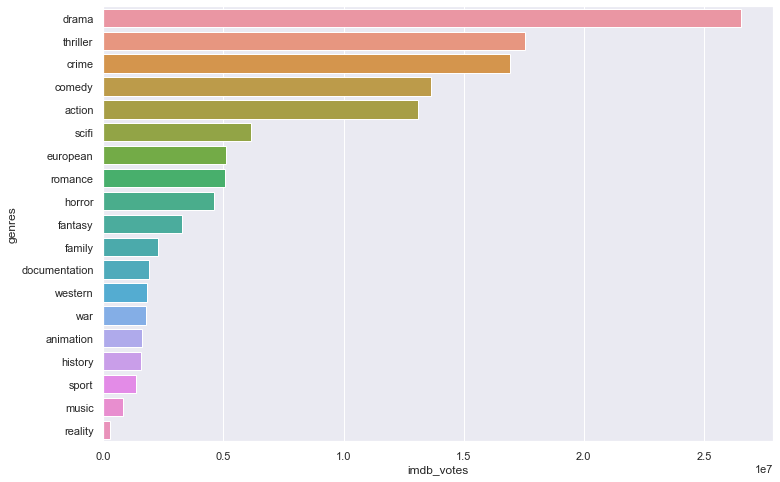

In [40]:
imdb_votes = films.groupby('genres')[['imdb_votes']].sum().sort_values(by='imdb_votes', ascending=False).reset_index()
sns.barplot(x='imdb_votes',y='genres',data=imdb_votes)
sns.set(rc={"figure.figsize":(12,8)})

**Сумма популярности на TMDB по жанрам**

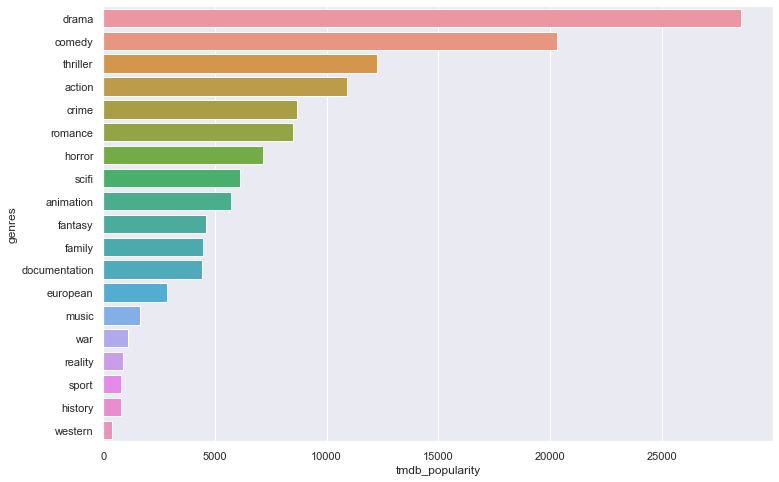

In [41]:
tmdb_popularity = films.groupby('genres')[['tmdb_popularity']].sum().sort_values(by='tmdb_popularity', ascending=False).reset_index()
sns.barplot(x='tmdb_popularity',y='genres',data=tmdb_popularity)
sns.set(rc={"figure.figsize":(12,8)})

**Рейтинг на IMDB по жанрам**

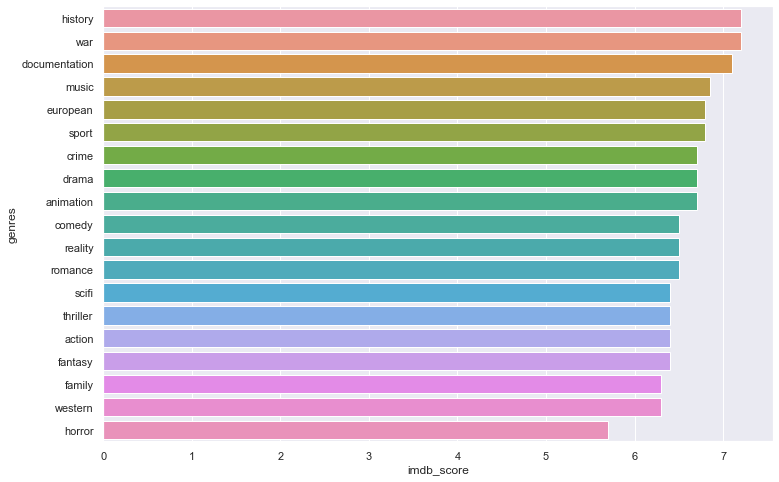

In [42]:
imdb_score = films.groupby('genres')[['imdb_score']].median().sort_values(by='imdb_score', ascending=False).reset_index()
sns.barplot(x='imdb_score',y='genres',data=imdb_score)
sns.set(rc={"figure.figsize":(12,8)})

**Рейтинг на TMDB по жанрам**

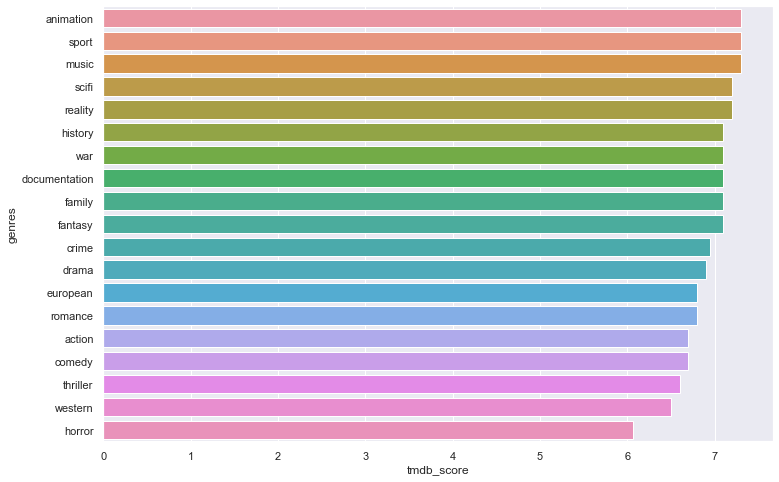

In [43]:
tmdb_score = films.groupby('genres')[['tmdb_score']].median().sort_values(by='tmdb_score', ascending=False).reset_index()
sns.barplot(x='tmdb_score',y='genres',data=tmdb_score)
sns.set(rc={"figure.figsize":(12,8)})

**Вывод**

По суммарному числу голосов на IMDB и популярности на TMDB лидером среди жанров стали драмы. 

Второе и третье место делят триллеры и комедии в рейтинге IMDB соответственно.

Второе и третье место делят комедии и триллеры в рейтинге TMDB соответственно.

При этом если смотреть на оценки фильмов и сериалов, которые ставят пользователи, то лучшие оценки не получают самые популярные жанры.

В обоих рейтингах самые популярные жанры даже не попали в первую пятёрку по самой высокой оценке жанра. 

### Какие фильмы являются самыми обсуждаемыми

**Посмотрим какие фильмы и сериалы попали в ТОП-5 по числу голосов на IMDB**


Фильмы и сериалы ТОП-5 по числу голосов на IMDB и их характеристики


,title,imdb_votes,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,tmdb_popularity,tmdb_score
1,Inception,2294231.0,MOVIE,2010.0,PG-13,148.0,action,GB,NaN,8.8,108.28,8.40
2,Forrest Gump,2021343.0,MOVIE,1994.0,PG-13,142.0,drama,US,NaN,8.8,63.45,8.48
3,Breaking Bad,1775990.0,SHOW,2008.0,TV-MA,48.0,crime,US,5.0,9.5,353.85,8.79
4,The Dark Knight Rises,1669067.0,MOVIE,2012.0,PG-13,165.0,crime,US,NaN,8.4,91.76,7.77
5,Se7en,1606270.0,MOVIE,1995.0,R,127.0,thriller,US,NaN,8.6,51.63,8.35


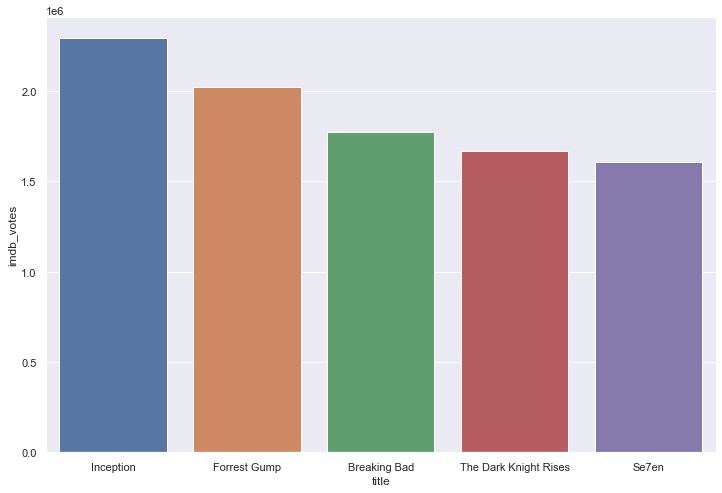

In [44]:
top_imdb_votes = films[['title', 'imdb_votes', 'type', 'release_year', 'age_certification', 'runtime',
                        'genres', 'production_countries', 'seasons', 'imdb_score', 'tmdb_popularity',
                        'tmdb_score']].sort_values(by='imdb_votes', ascending=False).head(5).reset_index(drop=True)
top_imdb_votes.index = np.arange(1, len(top_imdb_votes) + 1)
print('\nФильмы и сериалы ТОП-5 по числу голосов на IMDB и их характеристики')
display(top_imdb_votes)
sns.barplot(x='title',y='imdb_votes',data=top_imdb_votes)
sns.set(rc={"figure.figsize":(12,5)})

**Посмотрим какие фильмы и сериалы попали в ТОП-5 по популярности на TMDB**


Фильмы и сериалы ТОП-5 по популярности на TMDB и их характеристики


,title,tmdb_popularity,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_score
1,Incantation,2274.04,MOVIE,2022.0,NaN,111.0,horror,TW,NaN,6.2,5660.0,7.40
2,Stranger Things,2226.23,SHOW,2016.0,TV-14,61.0,drama,US,5.0,8.7,1101055.0,8.64
3,The Sea Beast,1723.36,MOVIE,2022.0,PG,115.0,comedy,US,NaN,7.1,18852.0,7.63
4,Valley of the Dead,1668.30,MOVIE,2022.0,R,101.0,comedy,ES,NaN,6.5,114.0,6.30
5,The Man from Toronto,1439.91,MOVIE,2022.0,PG-13,110.0,comedy,US,NaN,5.8,31497.0,6.45


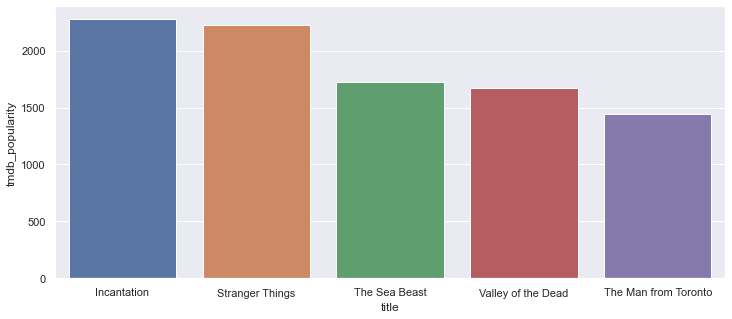

In [45]:
top_tmdb_popularity = films[['title', 'tmdb_popularity', 'type', 'release_year', 'age_certification', 'runtime', 
                             'genres', 'production_countries', 'seasons', 'imdb_score', 'imdb_votes', 
                             'tmdb_score']].sort_values(by='tmdb_popularity', ascending=False).head(5).reset_index(drop=True)
top_tmdb_popularity.index = np.arange(1, len(top_imdb_votes) + 1)
print('\nФильмы и сериалы ТОП-5 по популярности на TMDB и их характеристики')
display(top_tmdb_popularity)
sns.barplot(x='title',y='tmdb_popularity',data=top_tmdb_popularity)
sns.set(rc={"figure.figsize":(12,5)})

### Какие режиссеры выпустили наибольшее кол-во фильмов и сериалов

Список режисёров, которые выпустили наибольшее число фильмов и сериалов по убыванию


Режисёры, которые выпустили наибольшее число фильмов и сериалов по убыванию


,name_director,counts_films
1,RaГєl Campos,20
2,Jan Suter,19
3,Ryan Polito,17
4,Jay Karas,15
5,Marcus Raboy,14
6,Jay Chapman,12
7,Cathy Garcia-Molina,12
8,Youssef Chahine,11
9,Troy Miller,8
10,Suhas Kadav,8


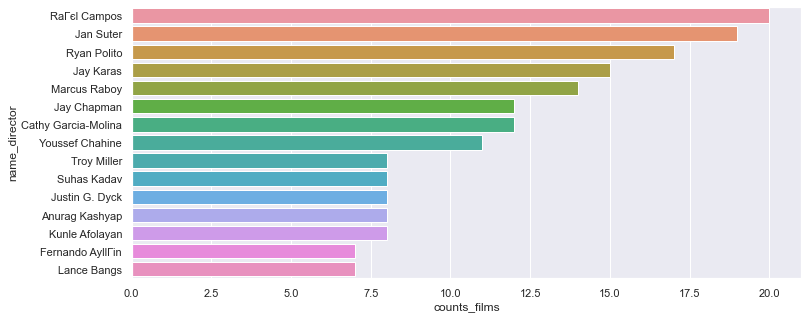

In [46]:
top_director = pd.DataFrame(actors[actors['role']=='DIRECTOR'].name.value_counts().head(15).reset_index()) 
top_director.index = np.arange(1, len(top_director) + 1)
top_director.columns = ['name_director', 'counts_films']
print('\nРежисёры, которые выпустили наибольшее число фильмов и сериалов по убыванию')
display(top_director)
sns.barplot(x='counts_films',y='name_director',data=top_director)
sns.set(rc={"figure.figsize":(12,8)})

### Какие возрастные категории самые популярные

**Сумма голосов на IMDB по возрастным категориям**

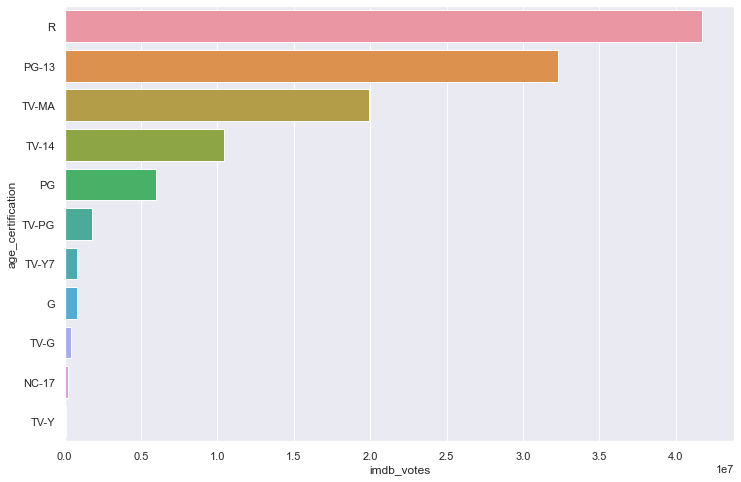

In [47]:
imdb_votes_age_cert = films.groupby('age_certification')[['imdb_votes']].sum().sort_values(
    by='imdb_votes', ascending=False).reset_index()
sns.barplot(x='imdb_votes',y='age_certification',data=imdb_votes_age_cert)
sns.set(rc={"figure.figsize":(12,8)})

**Сумма популярности на TMDB по возрастным категориям**

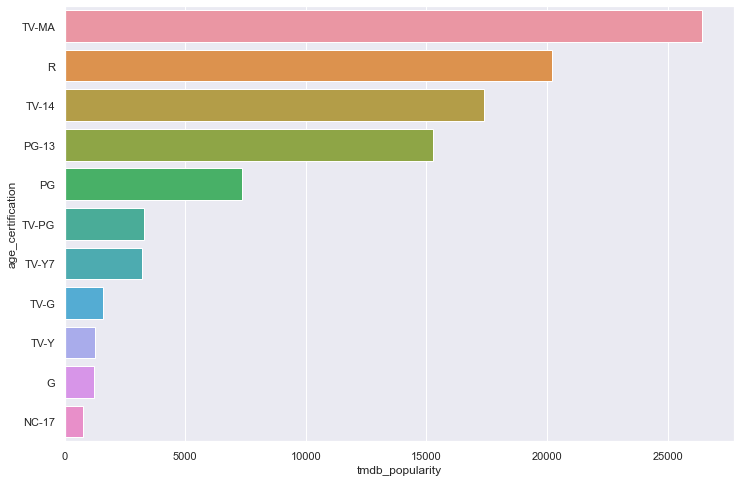

In [48]:
tmdb_popularity_age_cert = films.groupby('age_certification')[['tmdb_popularity']].sum().sort_values(
    by='tmdb_popularity', ascending=False).reset_index()
sns.barplot(x='tmdb_popularity',y='age_certification',data=tmdb_popularity_age_cert)
sns.set(rc={"figure.figsize":(12,8)})

## Вывод

Данный проект выполнялся без уточнения параметров у заказчика.

Инструмент для изучения данных, работы с ними и визуализации был выбран на моё усмотрение, но в реальной жизни все ожидания по визуализации и метрикам были бы уточнены при возможности у заказчика.

Для построения верхнеуровневого борда, я бы использовал 9 графиков из пункта "3. Анализ данных и визуализация" данного отчёта, если бы нужен был именно 1 борд.

Если можно использовать отчёт, то данная тетрадка имеет структуру полноценного проекта и можно представить для обсуждения топов все графики из пункта "3. Анализ данных и визуализация" вместе с таблицами.